In [1]:
import numpy as np
import pandas as pd
import warnings
from joblib import dump
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

%matplotlib inline

**1. LOAD THE TRAIN DATA**

In [2]:
train = pd.read_csv('../data/raw/train.csv')
print('Size of train data', train.shape)
train.head()

Size of train data (8000, 21)


,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


**2. LOAD THE TEST DATA**

In [3]:
test = pd.read_csv('../data/raw/test.csv')
print('Size of test data', test.shape)
test.head()

Size of test data (3799, 20)


,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,-0.0,1.8
2,3,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


**3. SUMMARISE THE TRAIN DATA**

We can see that all features are numeric types, and there are no missing value

In [4]:
print(train.info())
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,62.777875,18.576663,7.267087,2.807037,6.231213,44.608900,0.264525,0.816563,19.583700,...,1.947787,71.365825,1.077838,2.168500,3.245300,1.624513,0.648688,0.245212,1.257762,0.833625
std,3977.447579,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


**4. SUMMARISE THE TEST DATA**

In [5]:
print(test.info())
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       3799 non-null   int64  
 1   GP       3799 non-null   int64  
 2   MIN      3799 non-null   float64
 3   PTS      3799 non-null   float64
 4   FGM      3799 non-null   float64
 5   FGA      3799 non-null   float64
 6   FG%      3799 non-null   float64
 7   3P Made  3799 non-null   float64
 8   3PA      3799 non-null   float64
 9   3P%      3799 non-null   float64
 10  FTM      3799 non-null   float64
 11  FTA      3799 non-null   float64
 12  FT%      3799 non-null   float64
 13  OREB     3799 non-null   float64
 14  DREB     3799 non-null   float64
 15  REB      3799 non-null   float64
 16  AST      3799 non-null   float64
 17  STL      3799 non-null   float64
 18  BLK      3799 non-null   float64
 19  TOV      3799 non-null   float64
dtypes: float64(18), int64(2)
memory usage: 593.7 KB
None

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,19.234746,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,3954.173641,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,15.968989,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,1.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,-38.000000,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,3644.000000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,0.000000,0.100000,8.500000,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,7062.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,19.400000,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,10402.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,30.250000,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,13792.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,73.800000,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


**5. PREPARE THE TRAIN AND TEST DATA**

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
from src.data.data_prep import clean_train, clean_test

In [8]:
train_cleaned, target =  clean_train(train)
test_cleaned, test_id =  clean_test(test)

**6. EXPLORATORY DATA ANALYSIS**

**6A. Summary of different scales of the features in the train data**

The differences of the variables' `standard deviations` show those variables have different scales

In [9]:
stats = train_cleaned.describe()
print(f'''
Min of STD: {stats.loc['std'].min()} 
Std of STD: {stats.loc['std'].std()}
Max of STD: {stats.loc['std'].max()}''')


Min of STD: 0.38409304251465326 
Std of STD: 5.226821591946898
Max of STD: 17.118773818136244


In [10]:
stats = train.describe()
print(f'''
Min of STD: {stats.loc['std'].min()} 
Std of STD: {stats.loc['std'].std()}
Max of STD: {stats.loc['std'].max()}''')


Min of STD: 0.37244019430950726 
Std of STD: 867.0940319350381
Max of STD: 3977.4475785123805


**6B. Visualise the data distributions of the train's columns**

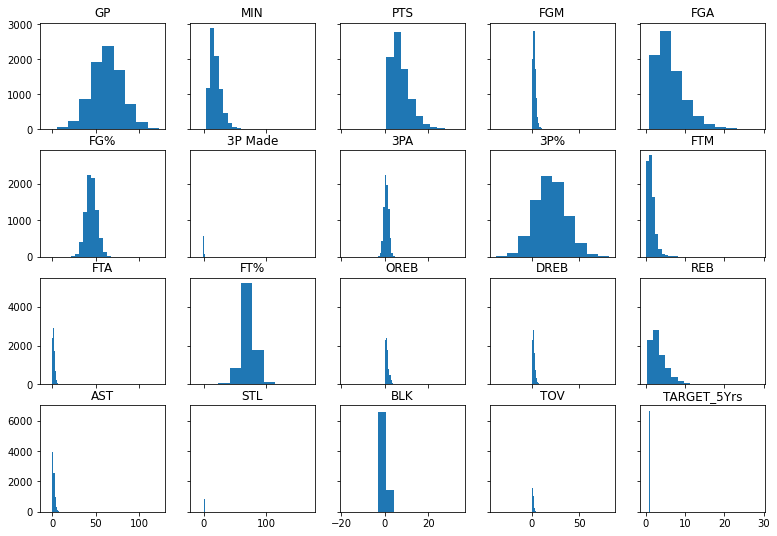

In [11]:
X = train.drop('Id', axis=1)
fig, ax = plt.subplots(4, 5, sharex='col', sharey='row', figsize=(13,9))

k = 0
for i in range(4):
    for j in range(5):
        ax[i, j].hist(X.iloc[:, k])
        ax[i, j].set_title(X.columns[k])
        k +=1

**6C. Distribution of the target variable in the train data**

It shows the dataset is imbalance with 83% of NBA players staying at least 5 years in the league.

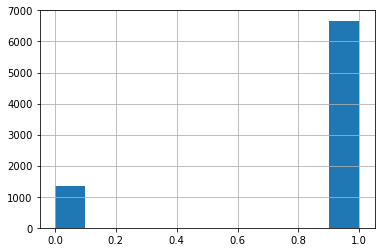

1331 rows of TARGET_5Yrs for category 0
6669 rows of TARGET_5Yrs for category 1
proportion of category 1 in the column TARGET_5Yrs:  83%


In [12]:
fig = train['TARGET_5Yrs'].hist()
plt.show(fig)
print(len(train[train['TARGET_5Yrs']==0]), 'rows of TARGET_5Yrs for category 0')
print(len(train[train['TARGET_5Yrs']==1]), 'rows of TARGET_5Yrs for category 1')
print('proportion of category 1 in the column TARGET_5Yrs: ', 
      '{:.0%}'.format(len(train[train['TARGET_5Yrs']==1])/len(train), 2))

**8. SCALE THE TRAIN AND TEST DATA THEN SAVE THE SCALE TRANFORMER** 

In [13]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_cleaned)
test_scaled = scaler.transform(test_cleaned)
dump(scaler, '../models/jason_scaler.joblib')

**9. SAVE THE SCALED DATA (TRAIN AND TEST SETS) AND THEIR TARGETS** 

As the train data is relatively smaill, we decided not create a validation set from it. <br>
We also saved the test_id variable for use later.

In [ ]:
from src.data.jason_sets import save_sets

save_sets(X_train=train_scaled, y_train=target, X_val=None, y_val=None, 
          X_test=test_scaled, y_test=None, test_id=test_id, path='../data/processed/')

**10. FIT VARIOUS MODELS TO IDENTIFY THE BEST ONE**

We can see that Logistic Regression is best algorithm for the NBA dataset.

In [14]:
from src.models.train_model import classification_model

models = [LogisticRegression(),
          GaussianNB(),
          RandomForestClassifier(),
          SVC(),
          KNeighborsClassifier(),
          DecisionTreeClassifier()]      
          
for model in models:
    score = classification_model(model, train_scaled, target)
    print(f'AUC score of {model.__class__.__name__} is {score:.4f}')

AUC score of LogisticRegression is 0.7009
AUC score of GaussianNB is 0.6764
AUC score of RandomForestClassifier is 0.6737
AUC score of SVC is 0.6013
AUC score of KNeighborsClassifier is 0.5901
AUC score of DecisionTreeClassifier is 0.5479


**11. USE THE BEST MODEL TO PREDICT ON TEST DATA AND SAVE THE RESULT**

In [ ]:
from src.models.predict_model import save_prediction

logistic = LogisticRegression()
logistic.fit(train_scaled, target)
dump(logistic,  '../models/logistic_default.joblib')

save_prediction(logistic, test_scaled, test_id, 'logistic_default_prediction')

**12. EVALUATE THE PERFORMANCE OF LOGISTIC REGRESSION ON THE DATA OVERSAMPED WITH SMOTE**

In [15]:
oversample = SMOTE()
X, y = oversample.fit_resample(train_scaled, target)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
scores = cross_val_score(LogisticRegression(max_iter=200), X, y, scoring='roc_auc', cv=kfold)
scores.mean()

0.7135872454792398

**13. FIT LOGISTIC REGRESSION WITH SMOTE DATA AND SAVE THE PREIDCTION RESULT**

In [ ]:
logistic = LogisticRegression()
logistic.fit(X, y)
dump(logistic,  '../jason_logistic_default_smote.joblib')

save_prediction(logistic, test_scaled, test_id, 'logistic_default_smote_pred')